In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as s

In [4]:
df = pd.read_csv("bank.csv",sep=";")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
df["marital"] = df["marital"].replace({ "single" : 0, "married" : 1})
df["housing"] = df["housing"].replace({ "no" : 0, "yes" : 1})
df["loan"] = df["loan"].replace({ "no" : 0, "yes" : 1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [16]:
df["job"] = df["job"].replace({
'unknown' : np.nan,
'unemployed' : 0,
'services' : 1,
    'management': 2,
    'blue-collar': 3,
    'self-employed' : 4, 'technician' : 5, 'entrepreneur' :6, 'admin.' : 7 , 'student':8,
       'housemaid' :9, 'retired':10
    
})

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1.0,1,secondary,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,4.0,1,tertiary,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,5.0,1,secondary,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,secondary,no,1137,0,0,cellular,6,feb,129,4,211,3,other,no


In [18]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [19]:
df["education"] = df["education"].replace({'primary' :0, 'secondary':1, 'tertiary':2, 'unknown':np.nan})

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [22]:
df["default"] = df["default"].replace({"no":1,"yes":0})

In [24]:
df["contact"].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [25]:
df["contact"] = df["contact"].replace({'cellular':1, 'unknown':np.nan, 'telephone':0})

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,1,1787,0,0,1.0,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,1,4789,1,1,1.0,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,1,1350,1,0,1.0,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,1,1476,1,1,NaN,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,1,0,1,0,NaN,5,may,226,1,-1,0,unknown,no


In [27]:
df["month"].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [28]:
df["month"] = df["month"].replace({'oct':10, 'may':5, 'apr':4, 'jun':6, 'feb':2, 'aug':8, 'jan':1, 'jul':7, 'nov':11,
       'sep':9, 'mar':3, 'dec':12})

In [29]:
df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [30]:
df["poutcome"]=df["poutcome"].replace({'unknown':np.nan, 'failure':0, 'other':2, 'success':1})

In [31]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [32]:
df["y"] = df["y"].replace({'no':0, 'yes':1})

In [33]:
df.describe()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,4.037252,1.155053,0.983190,1422.657819,0.566025,0.152842,0.905849,15.915284,6.166777,263.961292,2.793630,39.766645,0.542579,0.640931,0.115240
std,10.576211,2.534139,0.666325,0.128575,3009.638142,0.495676,0.359875,0.292084,8.247667,2.378380,259.856633,3.109807,100.121124,1.693562,0.844900,0.319347
min,19.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1.000000,9.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,444.000000,1.000000,0.000000,1.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,2.000000,1.000000,1480.000000,1.000000,0.000000,1.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,2.000000,1.000000,71188.000000,1.000000,1.000000,1.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000,2.000000,1.000000


In [34]:
df.count()

age          4521
job          4483
marital      4521
education    4334
default      4521
balance      4521
housing      4521
loan         4521
contact      3197
day          4521
month        4521
duration     4521
campaign     4521
pdays        4521
previous     4521
poutcome      816
y            4521
dtype: int64

In [36]:
df.duration = df.duration.apply(lambda x :((x-df.duration.min())/df.duration.max()-df.duration.min()))

In [37]:
df.describe()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,4.037252,1.155053,0.983190,1422.657819,0.566025,0.152842,0.905849,15.915284,6.166777,-3.914062,2.793630,39.766645,0.542579,0.640931,0.115240
std,10.576211,2.534139,0.666325,0.128575,3009.638142,0.495676,0.359875,0.292084,8.247667,2.378380,0.085903,3.109807,100.121124,1.693562,0.844900,0.319347
min,19.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1.000000,9.000000,5.000000,-3.966942,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,444.000000,1.000000,0.000000,1.000000,16.000000,6.000000,-3.940165,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,2.000000,1.000000,1480.000000,1.000000,0.000000,1.000000,21.000000,8.000000,-3.892562,3.000000,-1.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,2.000000,1.000000,71188.000000,1.000000,1.000000,1.000000,31.000000,12.000000,-3.001322,50.000000,871.000000,25.000000,2.000000,1.000000


In [44]:
df.to_csv("preprocessed_bank.csk",index=False)

In [79]:
new_df = pd.read_csv("preprocessed_bank.csk")

In [80]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,1,1787,0,0,1.0,19,10,-3.975207,1,-1,0,NaN,0
1,33,1.0,1,1.0,1,4789,1,1,1.0,11,5,-3.928595,1,339,4,0.0,0
2,35,2.0,0,2.0,1,1350,1,0,1.0,16,4,-3.940165,1,330,1,0.0,0
3,30,2.0,1,2.0,1,1476,1,1,NaN,3,6,-3.935537,4,-1,0,NaN,0
4,59,3.0,1,1.0,1,0,1,0,NaN,5,5,-3.926612,1,-1,0,NaN,0


In [47]:
new_df.corr()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.246948,-0.190484,0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,-0.041756,0.045092
job,0.246948,1.000000,-0.159257,-0.000797,0.046488,-0.140553,0.009586,-0.084848,0.000524,0.026193,-0.009160,-0.041718,0.001408,0.022125,-0.004962,0.066550
education,-0.190484,-0.159257,1.000000,0.011623,0.056585,-0.072716,-0.024752,0.117748,0.017107,0.083234,-0.011193,0.009714,0.011531,0.030396,0.018278,0.055368
default,0.017885,-0.000797,0.011623,1.000000,0.070886,-0.006881,-0.063994,-0.023372,0.013261,-0.008917,0.011615,0.012348,0.026317,0.026656,-0.089184,-0.001303
balance,0.083820,0.046488,0.056585,0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,-0.021652,0.017905
housing,-0.193888,-0.140553,-0.072716,-0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.074410,-0.104683
loan,-0.011250,0.009586,-0.024752,-0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.042016,-0.070517
contact,-0.204200,-0.084848,0.117748,-0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.044501,-0.002108
day,-0.017853,0.000524,0.017107,0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.036512,-0.011244
month,0.073764,0.026193,0.083234,-0.008917,0.099872,-0.170922,0.039226,0.014321,0.080436,1.000000,-0.000282,0.059214,-0.112003,-0.037410,0.018250,0.023335


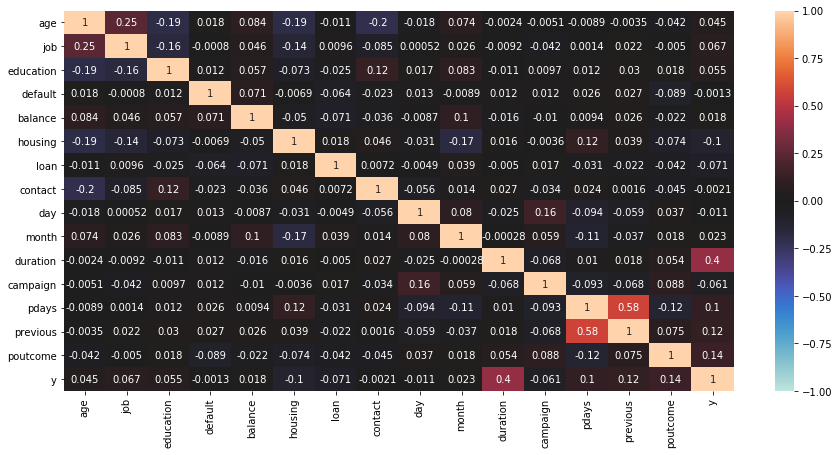

In [51]:
plt.figure(figsize=(15,7))
#Heatmap
corr = new_df.corr()
sns.heatmap(corr,vmin=-1,vmax=1,center = 0,annot = True)

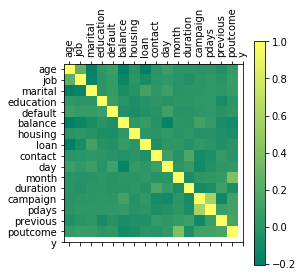

In [53]:
plt.matshow(new_df.corr(),cmap="summer")
plt.colorbar()
plt.xticks(list(range(len(new_df.columns))),new_df.columns,rotation="vertical")
plt.yticks(list(range(len(new_df.columns))),new_df.columns,rotation="horizontal")
plt.show()

In [58]:
new_df.corr()["y"].sort_values()

housing     -0.104683
loan        -0.070517
campaign    -0.061147
day         -0.011244
contact     -0.002108
default     -0.001303
balance      0.017905
month        0.023335
age          0.045092
education    0.055368
job          0.066550
pdays        0.104087
previous     0.116714
poutcome     0.142628
duration     0.401118
y            1.000000
Name: y, dtype: float64

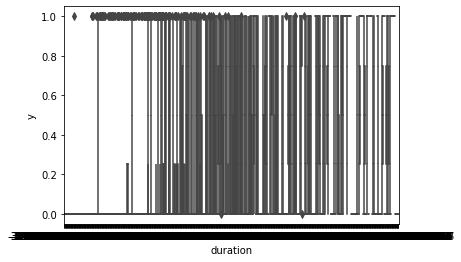

In [60]:
sns.boxplot(x="duration",y="y",data=new_df)

([<matplotlib.axis.XTick at 0x24f37331b08>,
 <a list of 17 Text xticklabel objects>)

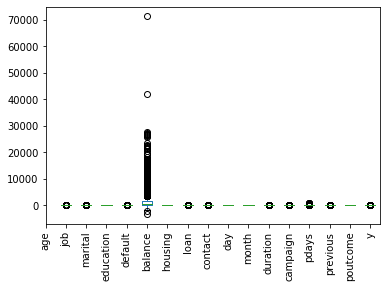

In [63]:
new_df.plot.box(by = "age")
plt.xticks(list(range(len(new_df.columns))),new_df.columns,rotation="vertical")

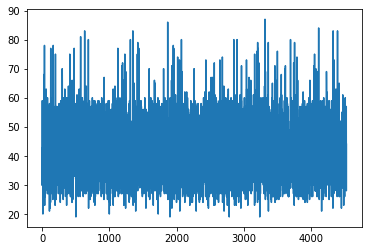

In [64]:
plt.plot(df.age.values)

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <a list of 10 Patch objects>)

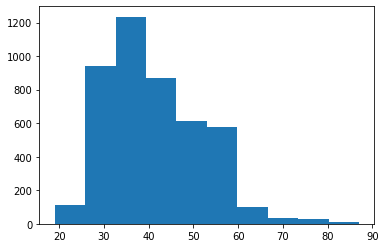

In [65]:
plt.hist(df.age.values)

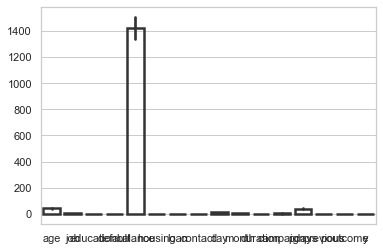

In [70]:
 sns.set(style="whitegrid")
sns.barplot(data=new_df,linewidth=2.5, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2")

{'whiskers': [<matplotlib.lines.Line2D at 0x24f37d1a788>,
 'caps': [<matplotlib.lines.Line2D at 0x24f380f6108>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f380ce2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x24f38119888>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f38119f88>],
 'means': []}

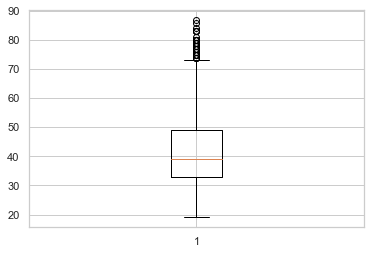

In [71]:
plt.boxplot(new_df.age)

In [77]:
new_df[new_Df["age"] > 70].age.count()

54

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <a list of 10 Patch objects>)

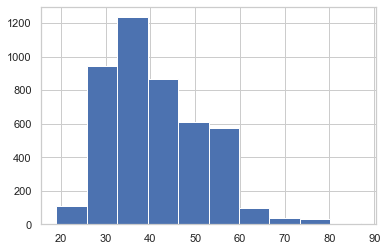

In [83]:
plt.hist(new_df.age)

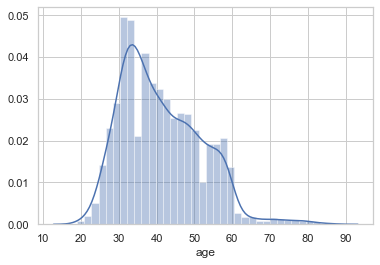

In [84]:
sns.distplot(new_df.age)